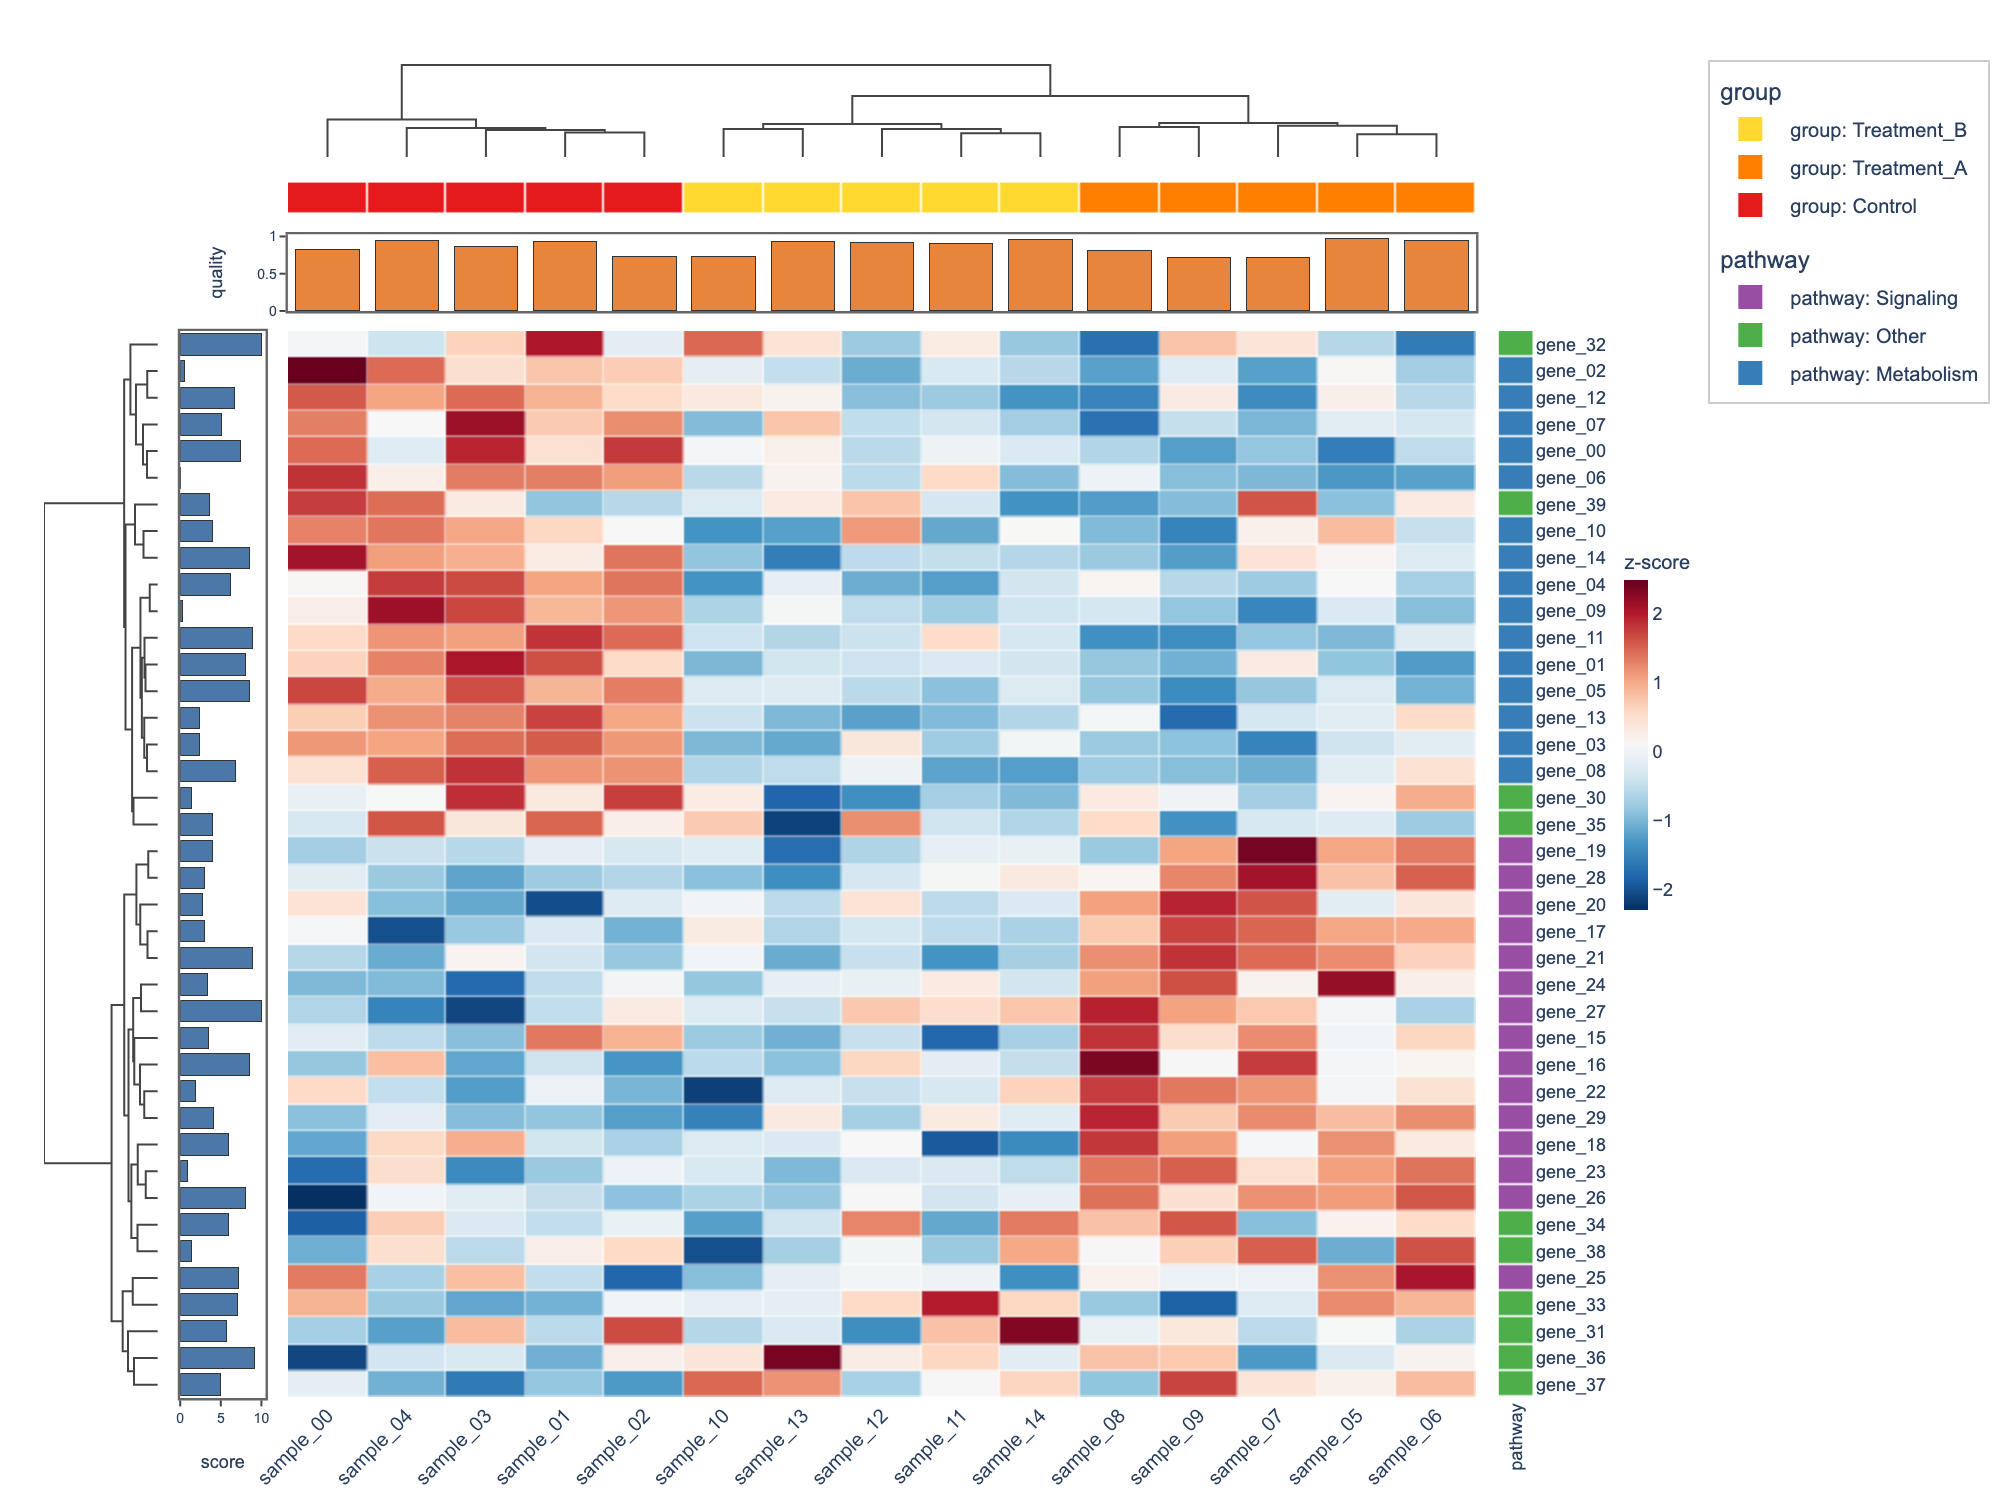

In [1]:
# Cell 1 — 3-side annotations (top + left + right) with dendrograms
import numpy as np
import pandas as pd
from plotly_complexheatmap import ComplexHeatmap, HeatmapAnnotation

rng = np.random.default_rng(42)
n_genes, n_samples = 40, 15
data = rng.standard_normal((n_genes, n_samples))
data[:15, :5] += 2.5
data[15:30, 5:10] += 2.0

df = pd.DataFrame(
    data,
    index=[f"gene_{i:02d}" for i in range(n_genes)],
    columns=[f"sample_{j:02d}" for j in range(n_samples)],
)

# Column annotation (top) — warm orange barplot
top_ha = HeatmapAnnotation(
    group=["Control"] * 5 + ["Treatment_A"] * 5 + ["Treatment_B"] * 5,
    quality={"values": rng.uniform(0.7, 1.0, n_samples), "type": "bar", "color": "#E8853D"},
)

# Row annotation (left) — cool blue barplot
left_ha = HeatmapAnnotation(
    score={"values": rng.uniform(0, 10, n_genes), "type": "bar", "color": "#4C78A8"},
    which="row",
)

# Row annotation (right) — categorical
right_ha = HeatmapAnnotation(
    pathway=["Metabolism"] * 15 + ["Signaling"] * 15 + ["Other"] * 10,
    which="row",
)

hm = ComplexHeatmap(
    df,
    top_annotation=top_ha,
    left_annotation=left_ha,
    right_annotation=right_ha,
    colorscale="RdBu_r",
    normalize="row",
    name="z-score",
    width=1000,
    height=750,
)
hm.to_plotly()

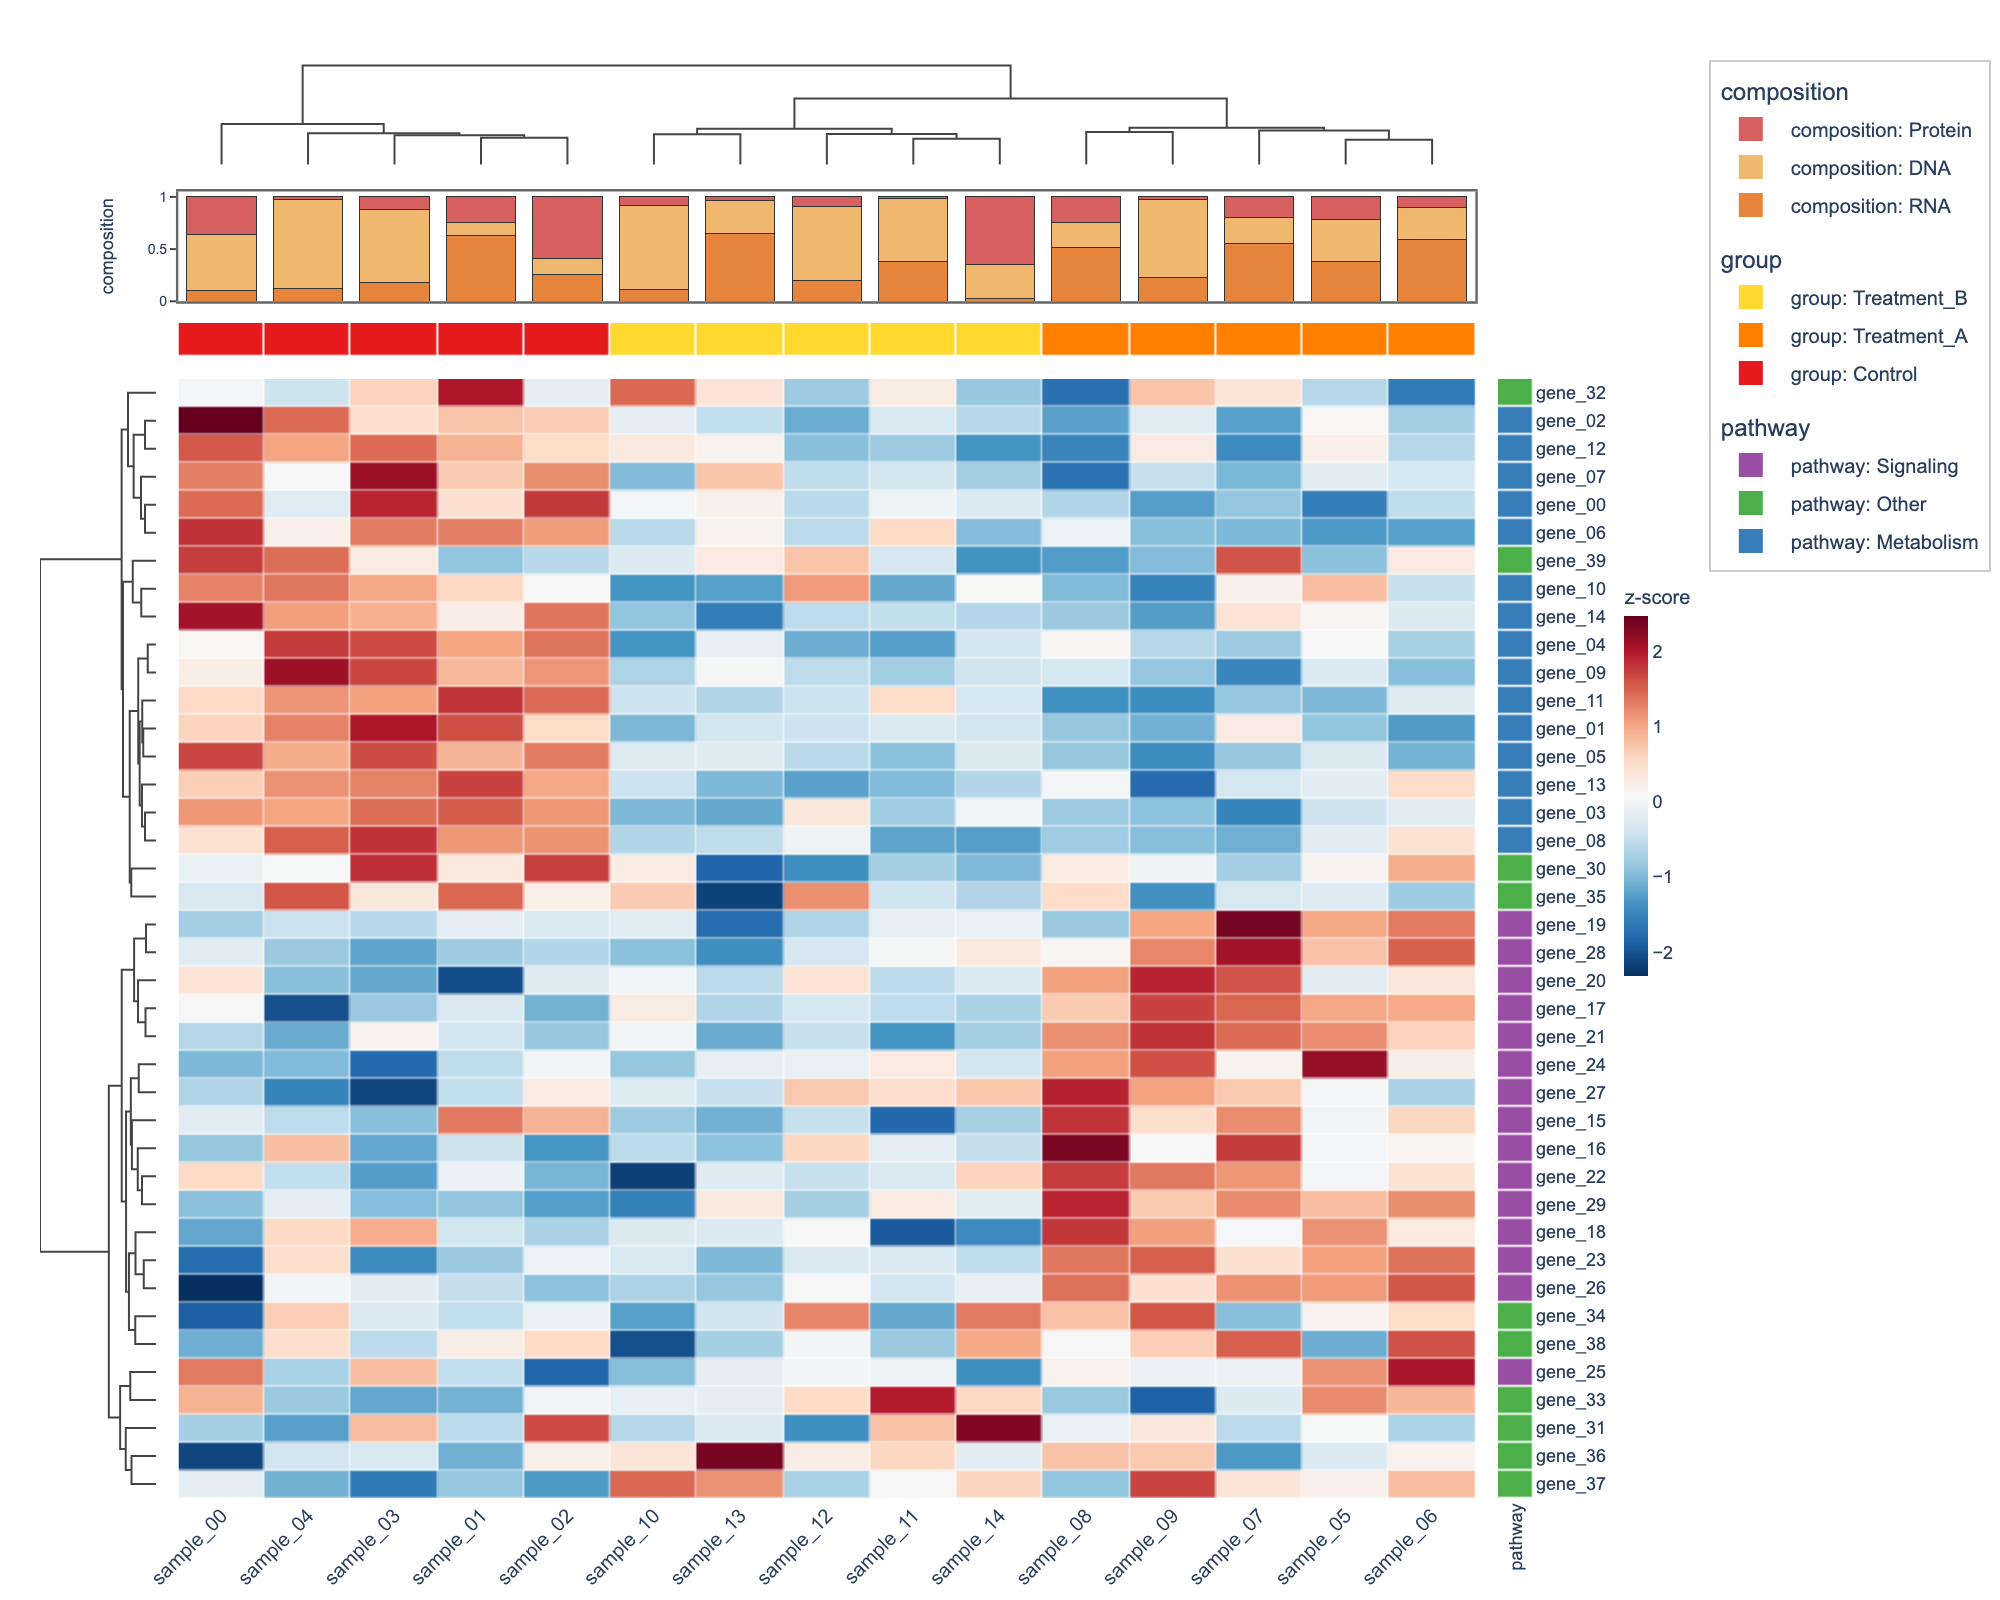

In [2]:
# Cell 2 — Stacked barplot (top, warm palette) + right categorical
stacked_data = rng.dirichlet([2, 3, 1], size=n_samples)

top_stacked = HeatmapAnnotation(
    composition={
        "values": stacked_data,
        "type": "stacked_bar",
        "stack_names": ["RNA", "DNA", "Protein"],
        "colors": ["#E8853D", "#F0B86E", "#D65F5F"],  # warm tones
    },
    group=["Control"] * 5 + ["Treatment_A"] * 5 + ["Treatment_B"] * 5,
)

hm2 = ComplexHeatmap(
    df,
    top_annotation=top_stacked,
    right_annotation=right_ha,
    colorscale="RdBu_r",
    normalize="row",
    name="z-score",
    width=1000,
    height=800,
)
hm2.to_plotly()

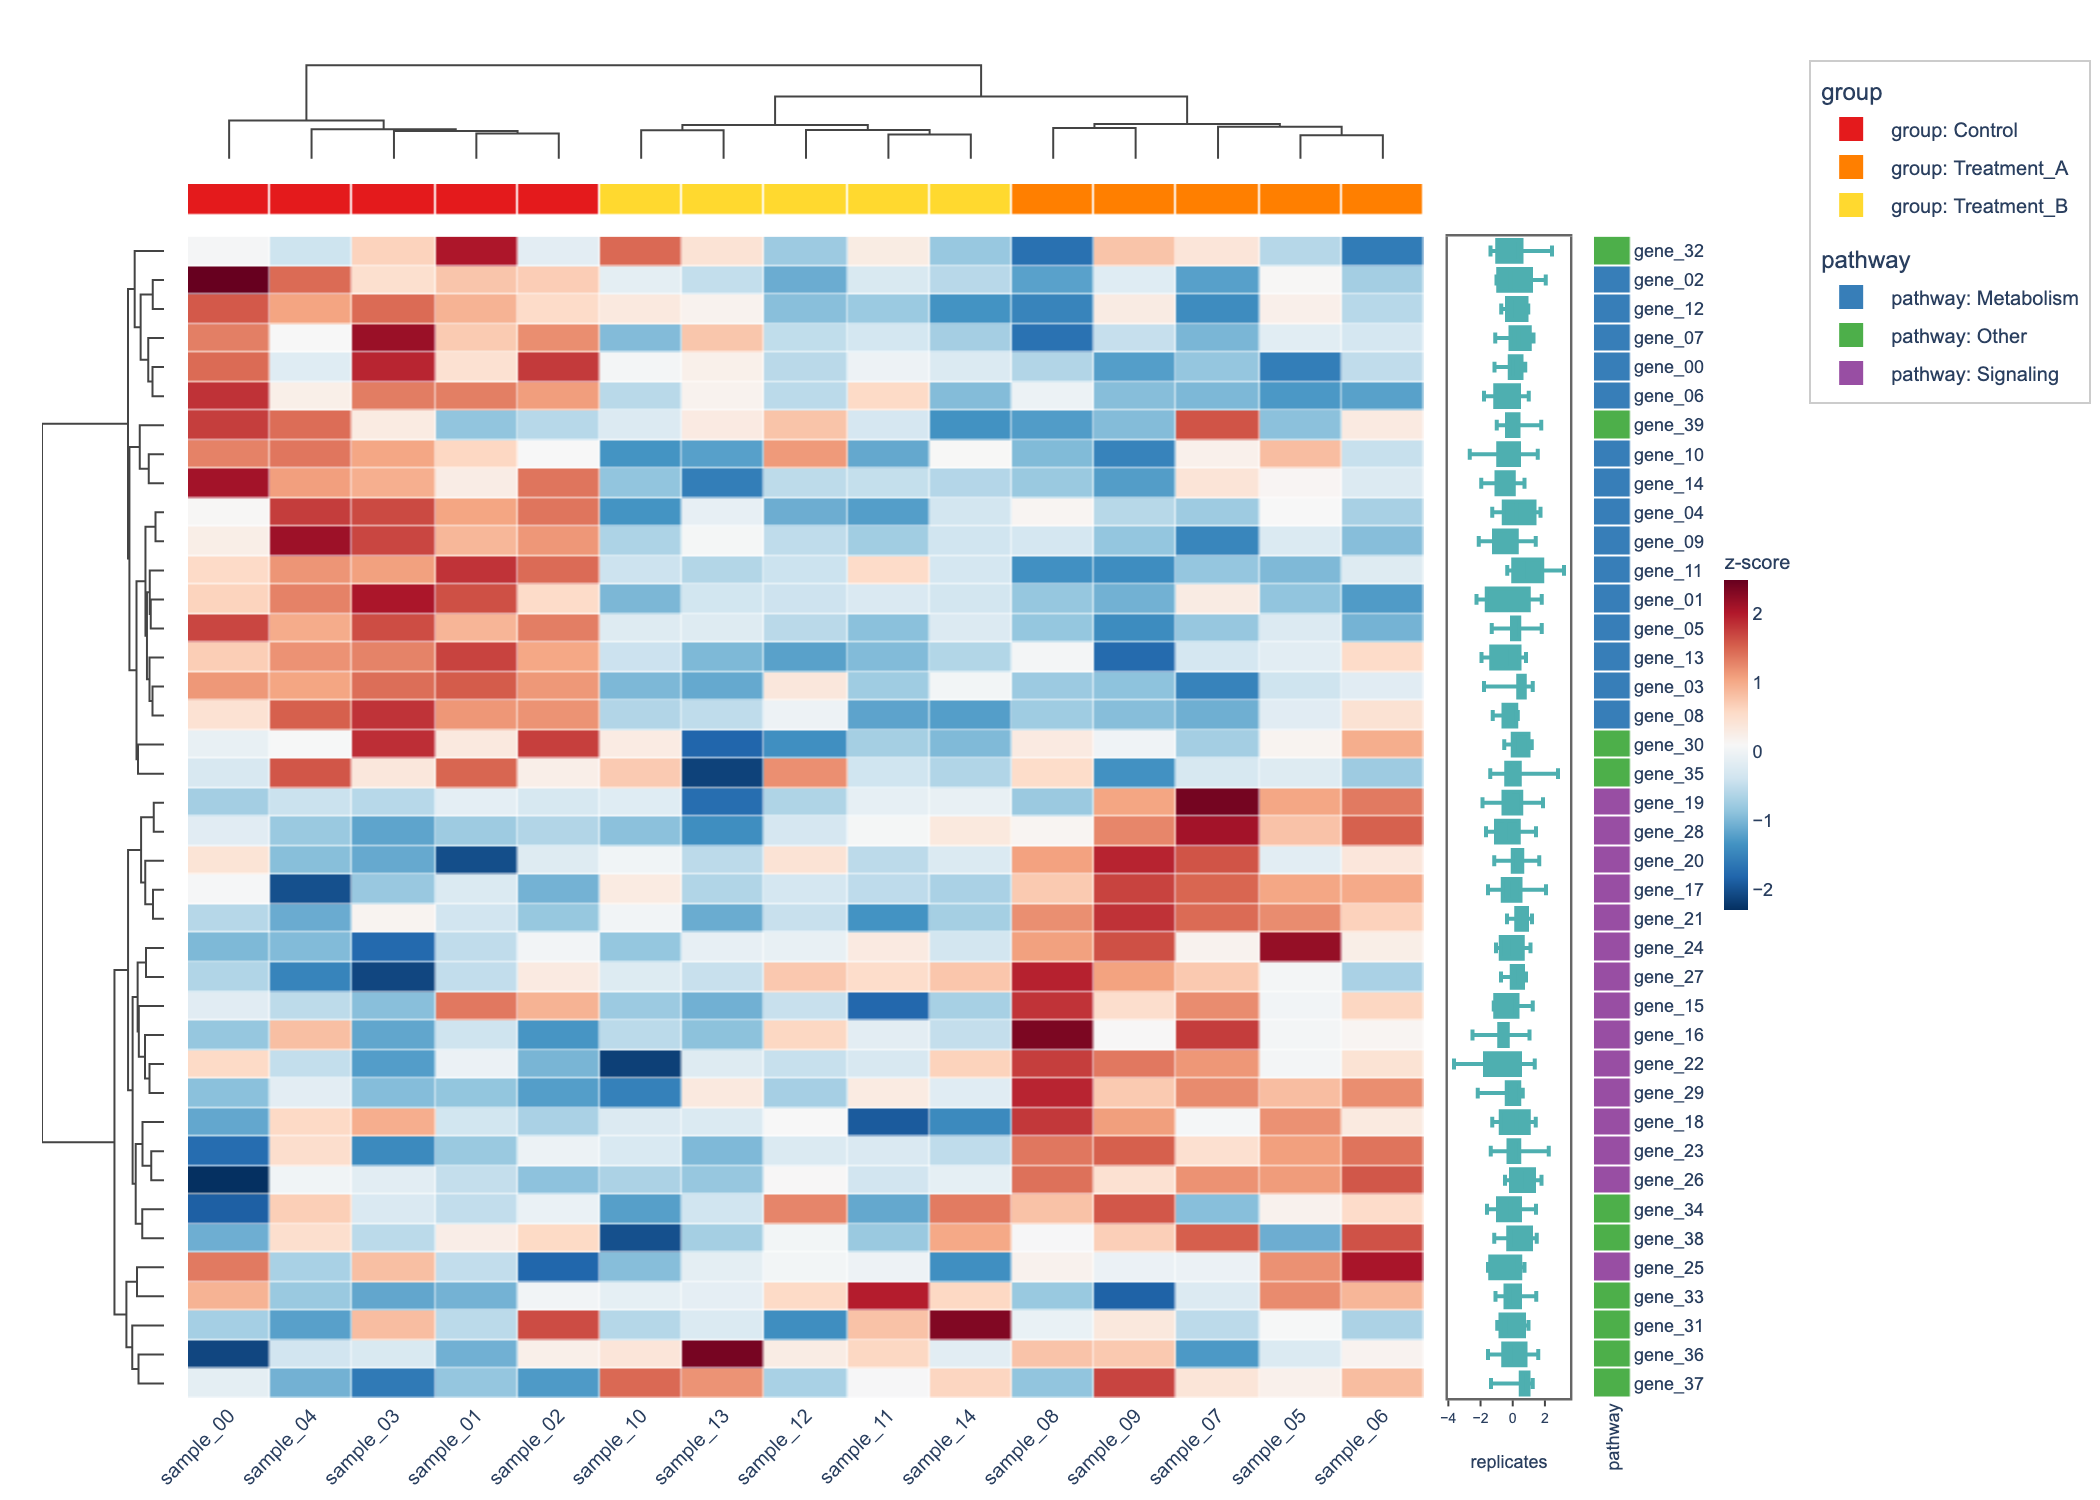

In [3]:
# Cell 3 — Box-plot annotation (right, cool teal) + top categorical
box_data = rng.standard_normal((n_genes, 10))  # 10 replicates per gene

right_box = HeatmapAnnotation(
    replicates={"values": box_data, "type": "box", "color": "#4EAFB0"},
    pathway=["Metabolism"] * 15 + ["Signaling"] * 15 + ["Other"] * 10,
    which="row",
)

top_simple = HeatmapAnnotation(
    group=["Control"] * 5 + ["Treatment_A"] * 5 + ["Treatment_B"] * 5,
)

hm3 = ComplexHeatmap(
    df,
    top_annotation=top_simple,
    right_annotation=right_box,
    colorscale="RdBu_r",
    normalize="row",
    name="z-score",
    width=1050,
    height=750,
)
hm3.to_plotly()

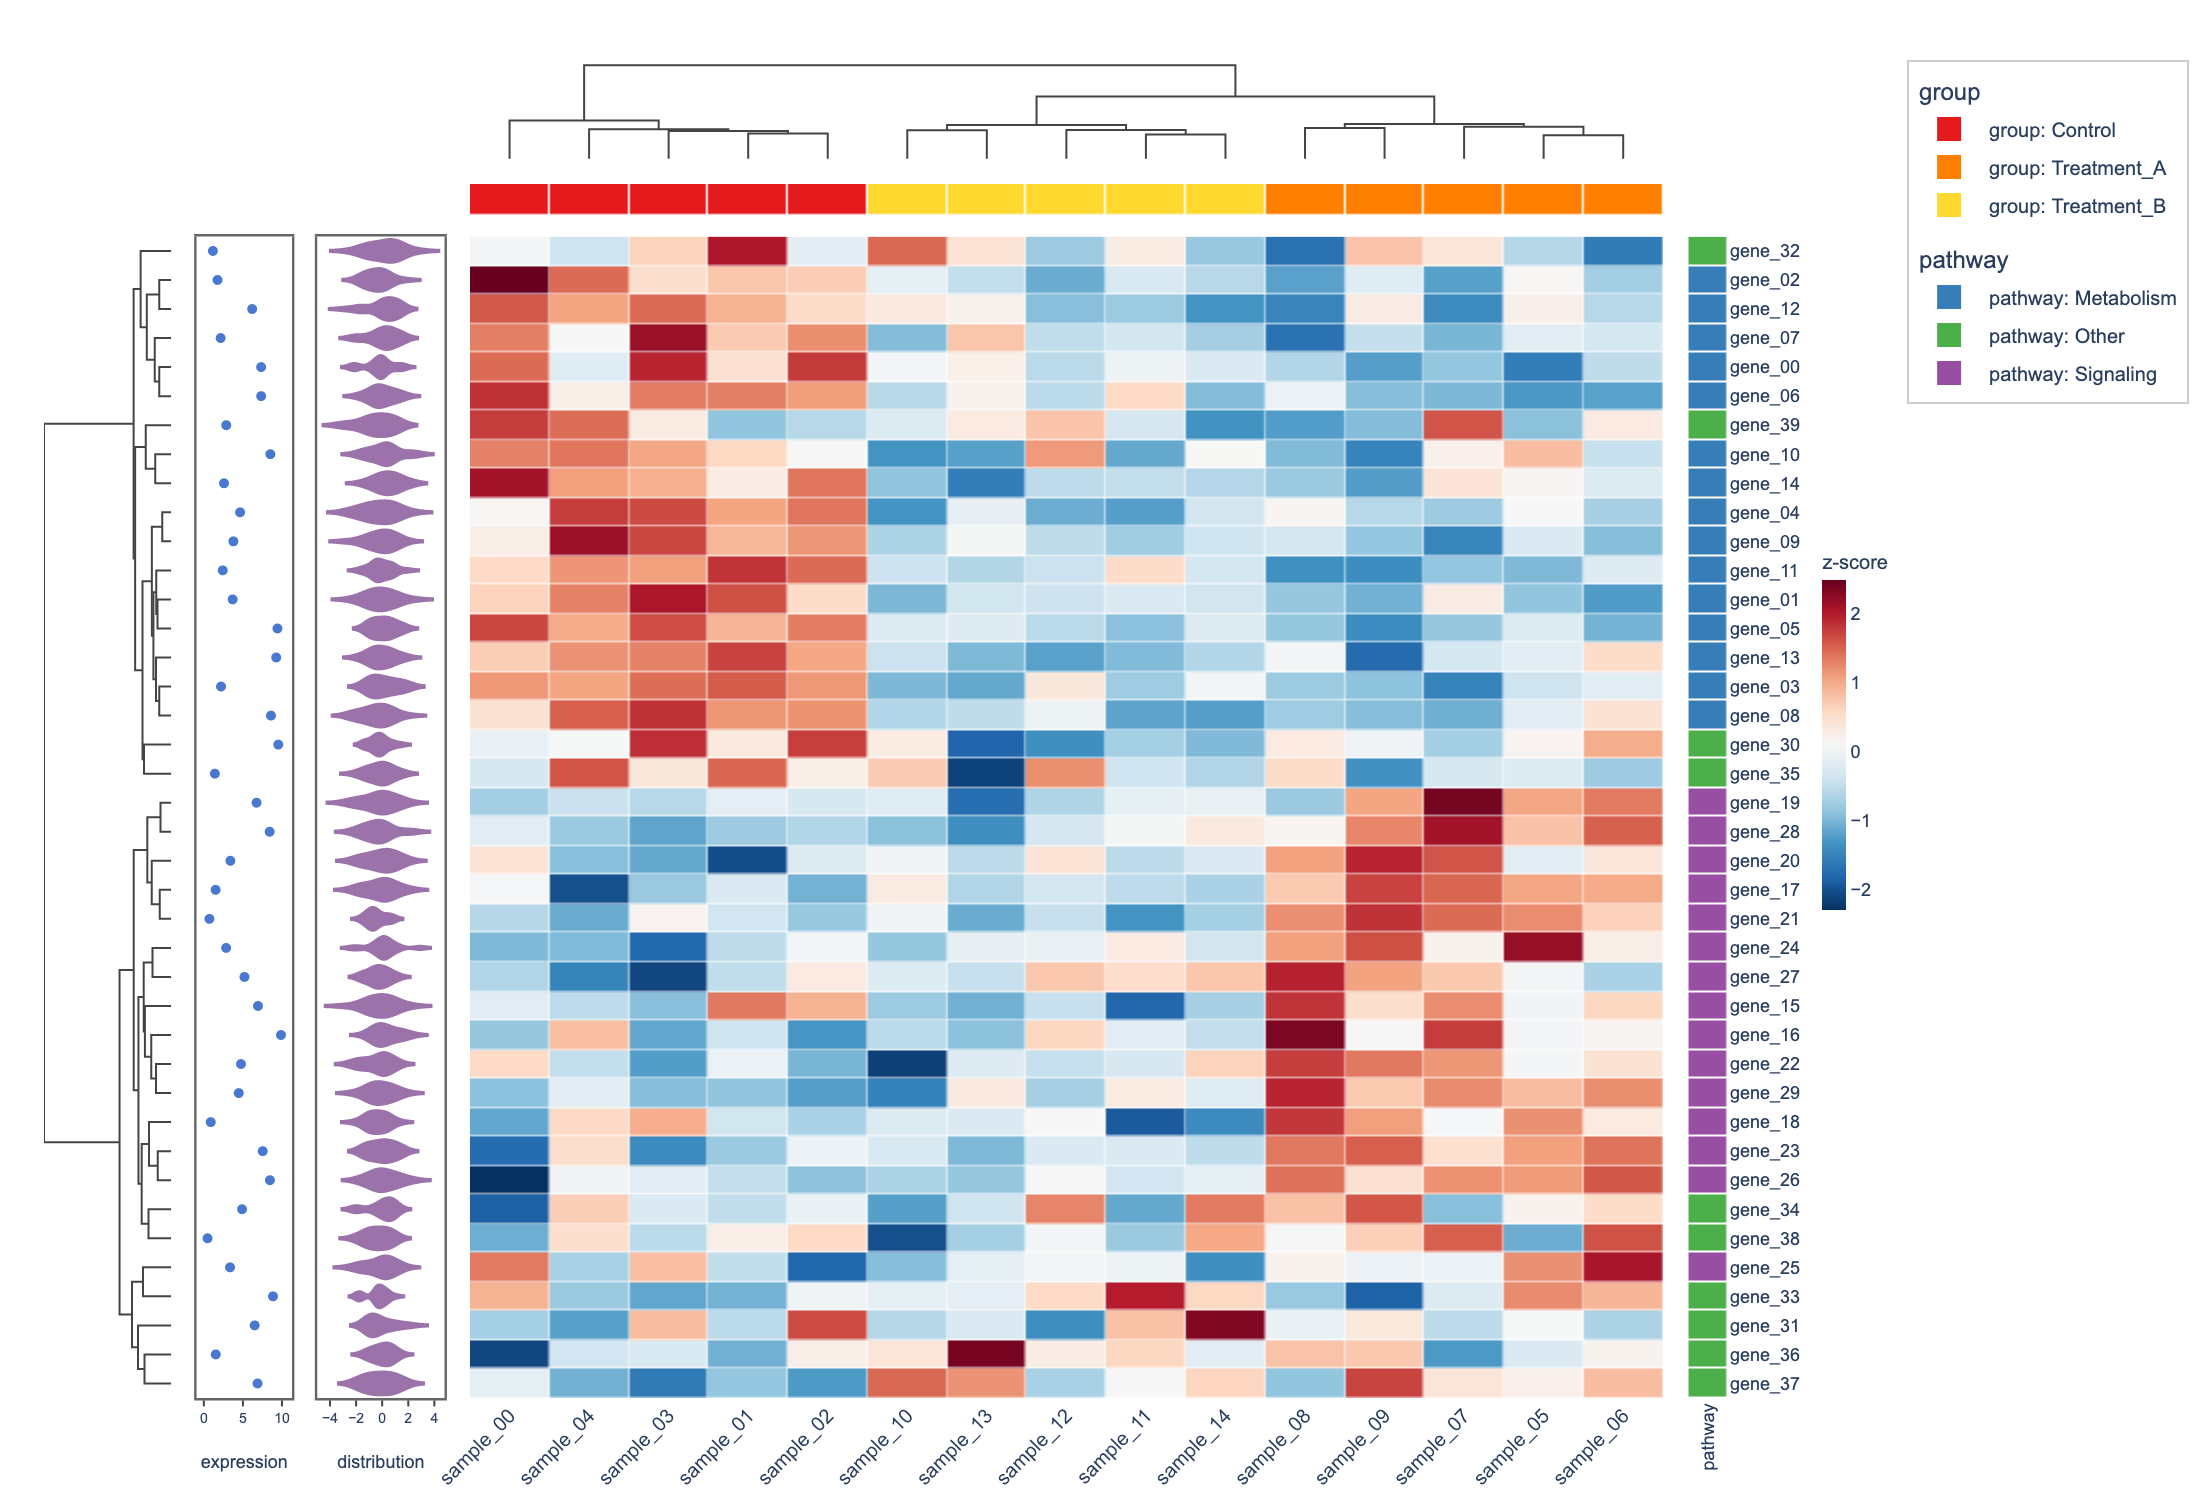

In [4]:
# Cell 4 — Scatter (left, blue) + Violin (left, purple) + right categorical
violin_data = rng.standard_normal((n_genes, 20))

left_rich = HeatmapAnnotation(
    expression={"values": rng.uniform(0, 10, n_genes), "type": "scatter", "color": "#4878CF"},
    distribution={"values": violin_data, "type": "violin", "color": "#9B72AA"},
    which="row",
)

hm4 = ComplexHeatmap(
    df,
    top_annotation=top_simple,
    left_annotation=left_rich,
    right_annotation=right_ha,
    colorscale="RdBu_r",
    normalize="row",
    name="z-score",
    width=1100,
    height=750,
)
hm4.to_plotly()

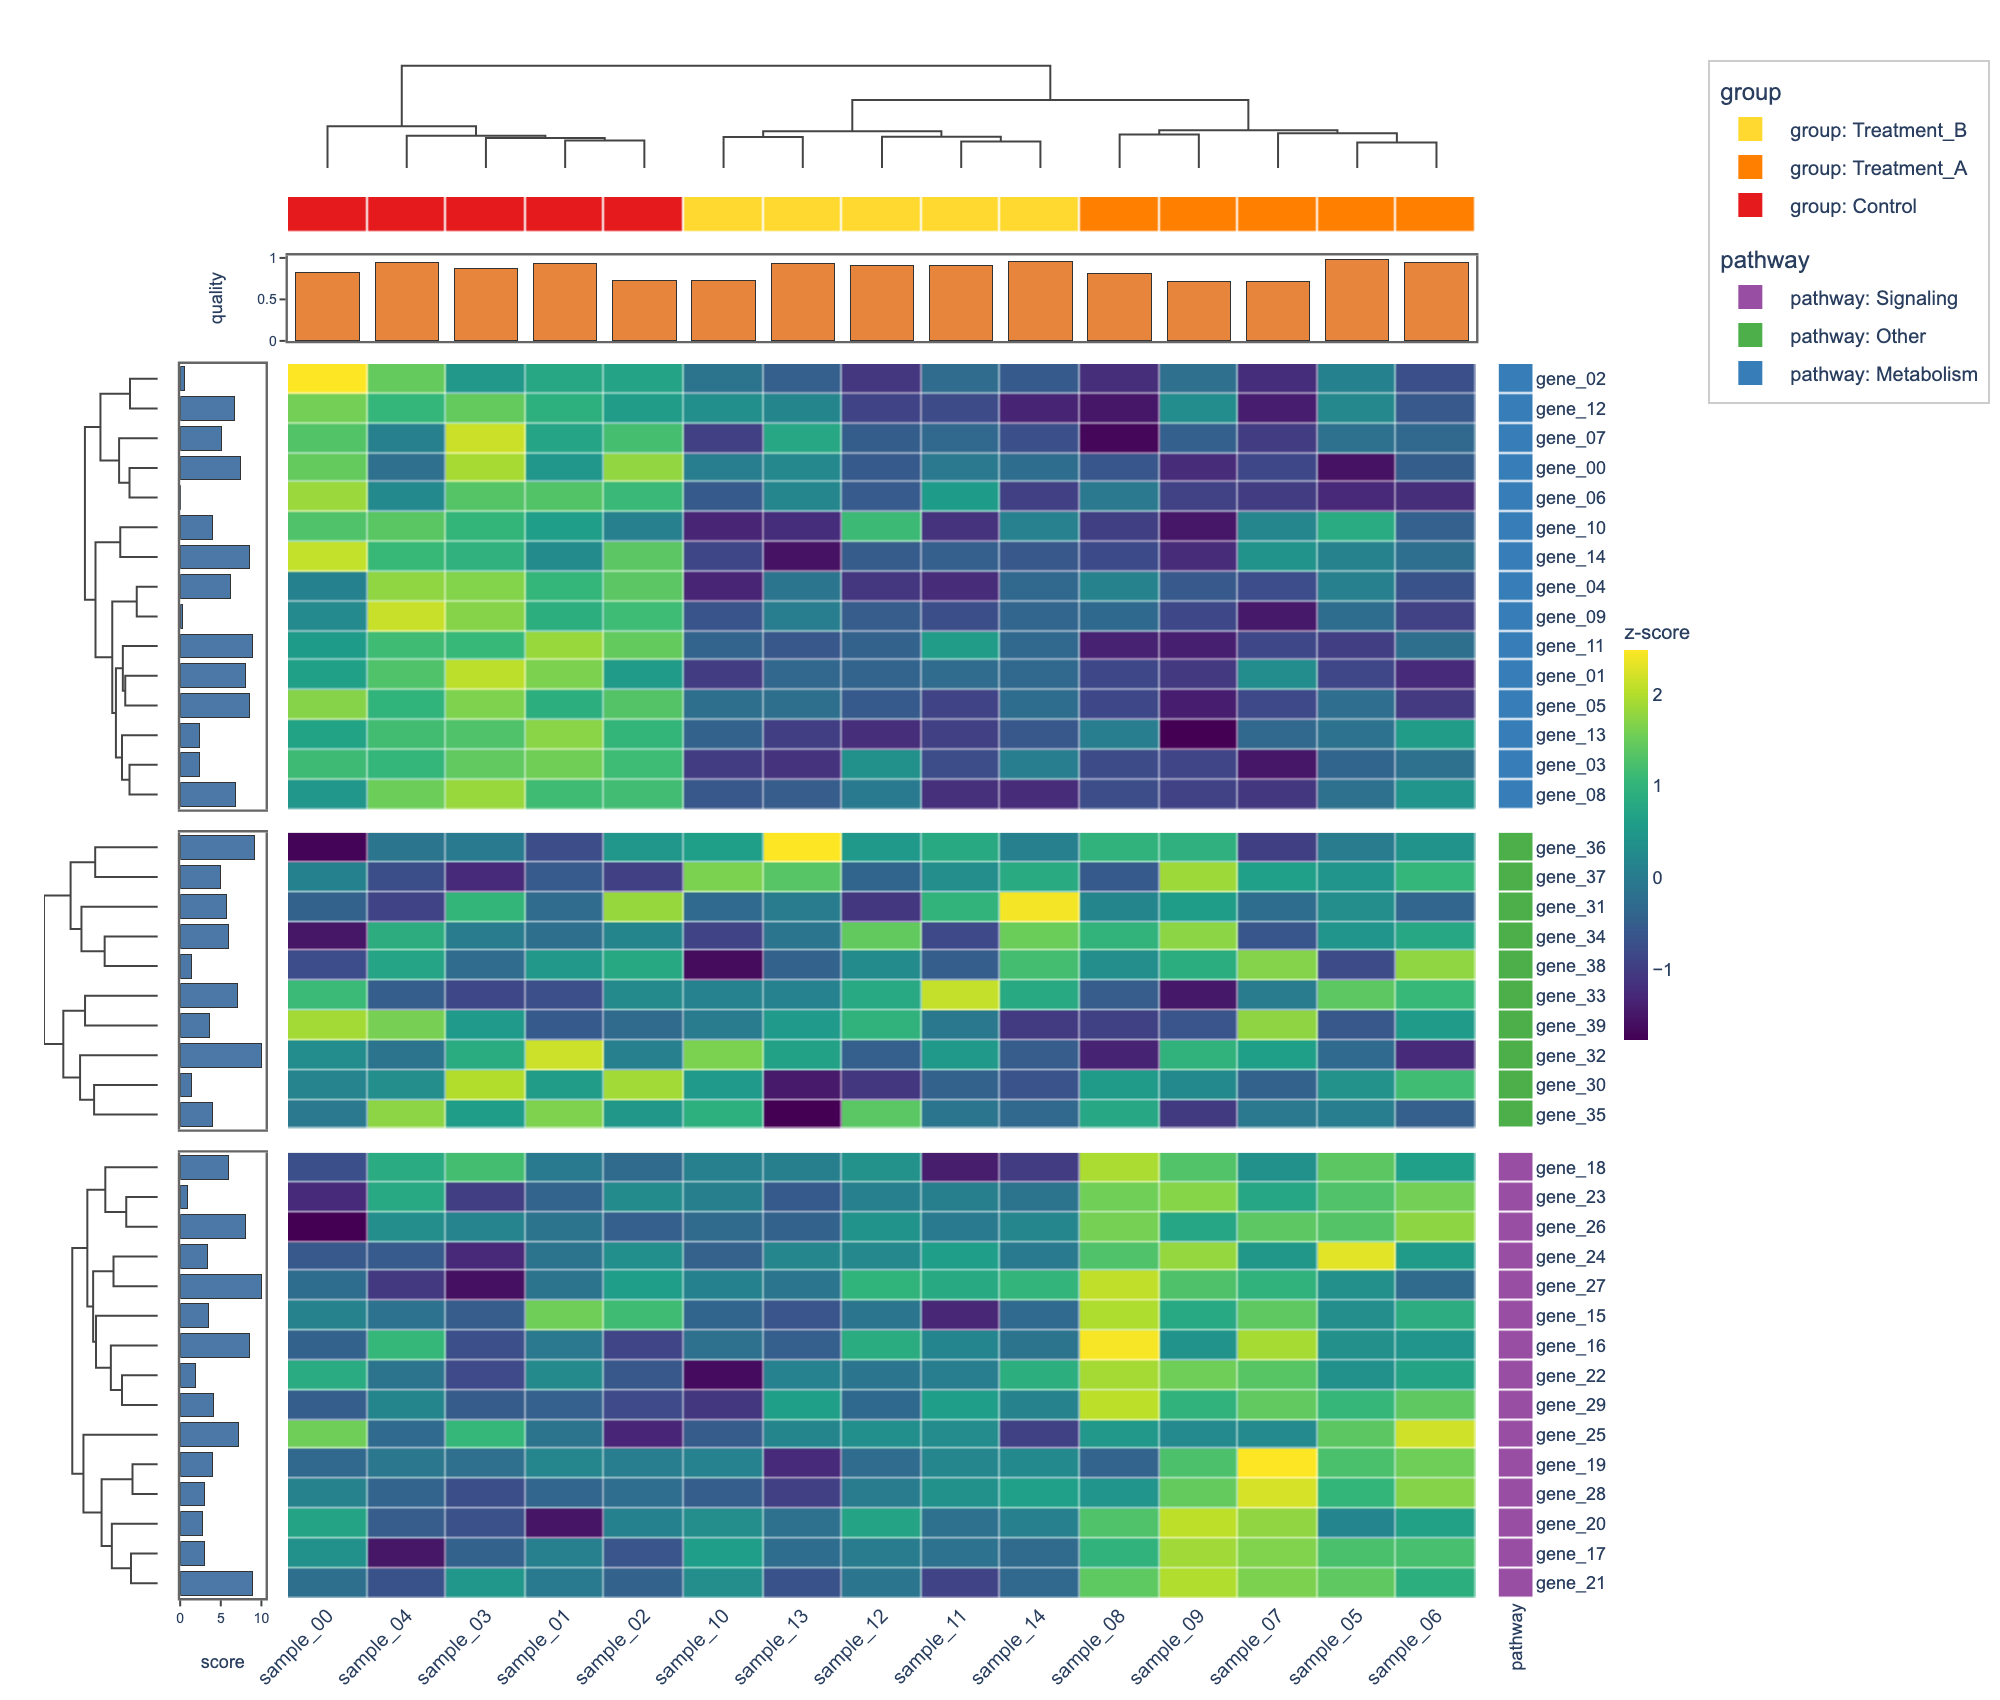

In [5]:
# Cell 5 — Split heatmap with left + right annotations and per-group dendrograms
hm5 = ComplexHeatmap(
    df,
    top_annotation=top_ha,
    left_annotation=left_ha,
    right_annotation=right_ha,
    split_rows_by="pathway",
    colorscale="Viridis",
    normalize="row",
    name="z-score",
    width=1000,
    height=850,
)
hm5.to_plotly()

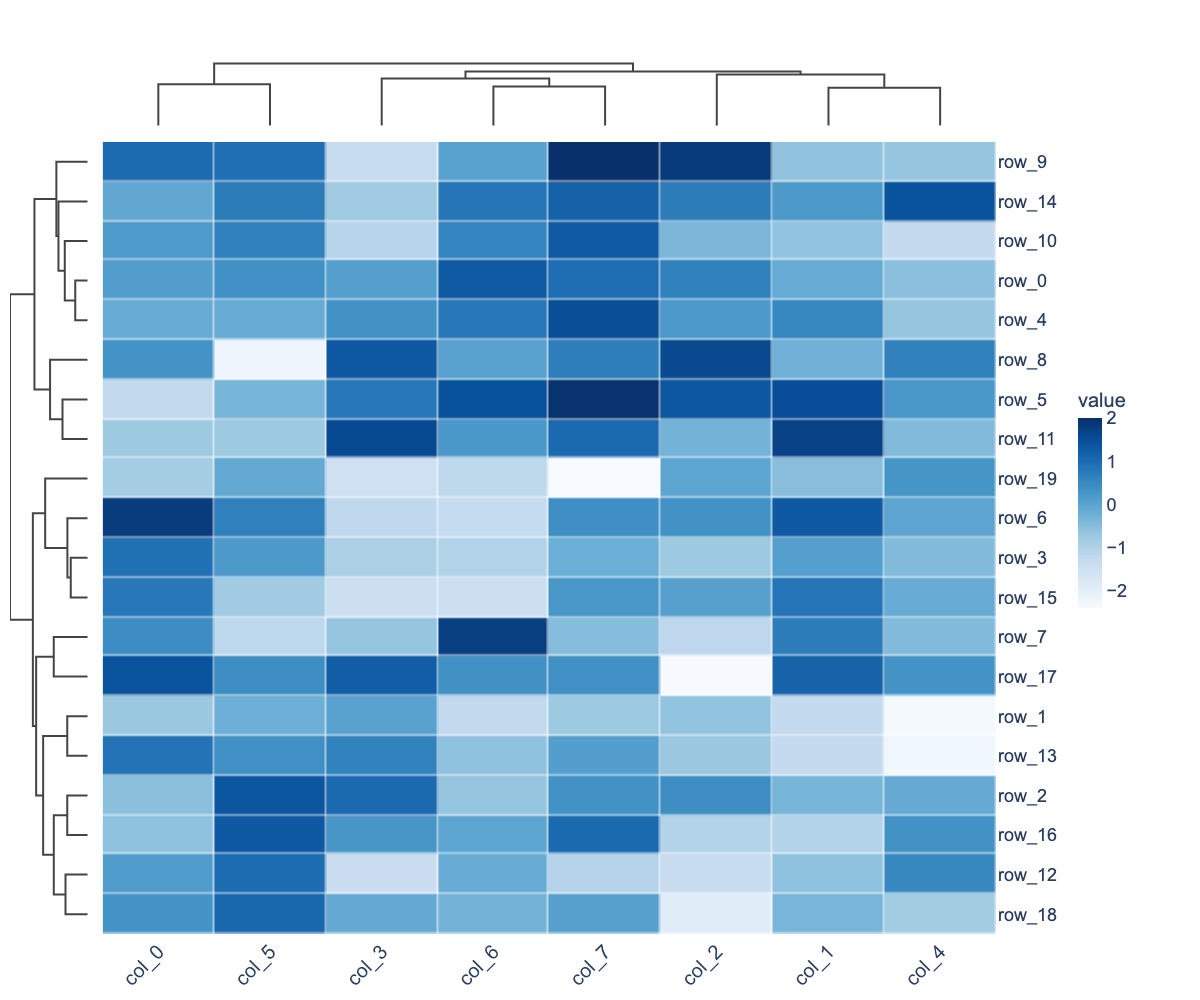

In [6]:
# Cell 6 — Minimal: just data + clustering, no annotations
rng2 = np.random.default_rng(0)
small = pd.DataFrame(
    rng2.standard_normal((20, 8)),
    index=[f"row_{i}" for i in range(20)],
    columns=[f"col_{j}" for j in range(8)],
)
ComplexHeatmap(small, colorscale="Blues", name="value", width=600, height=500).to_plotly()

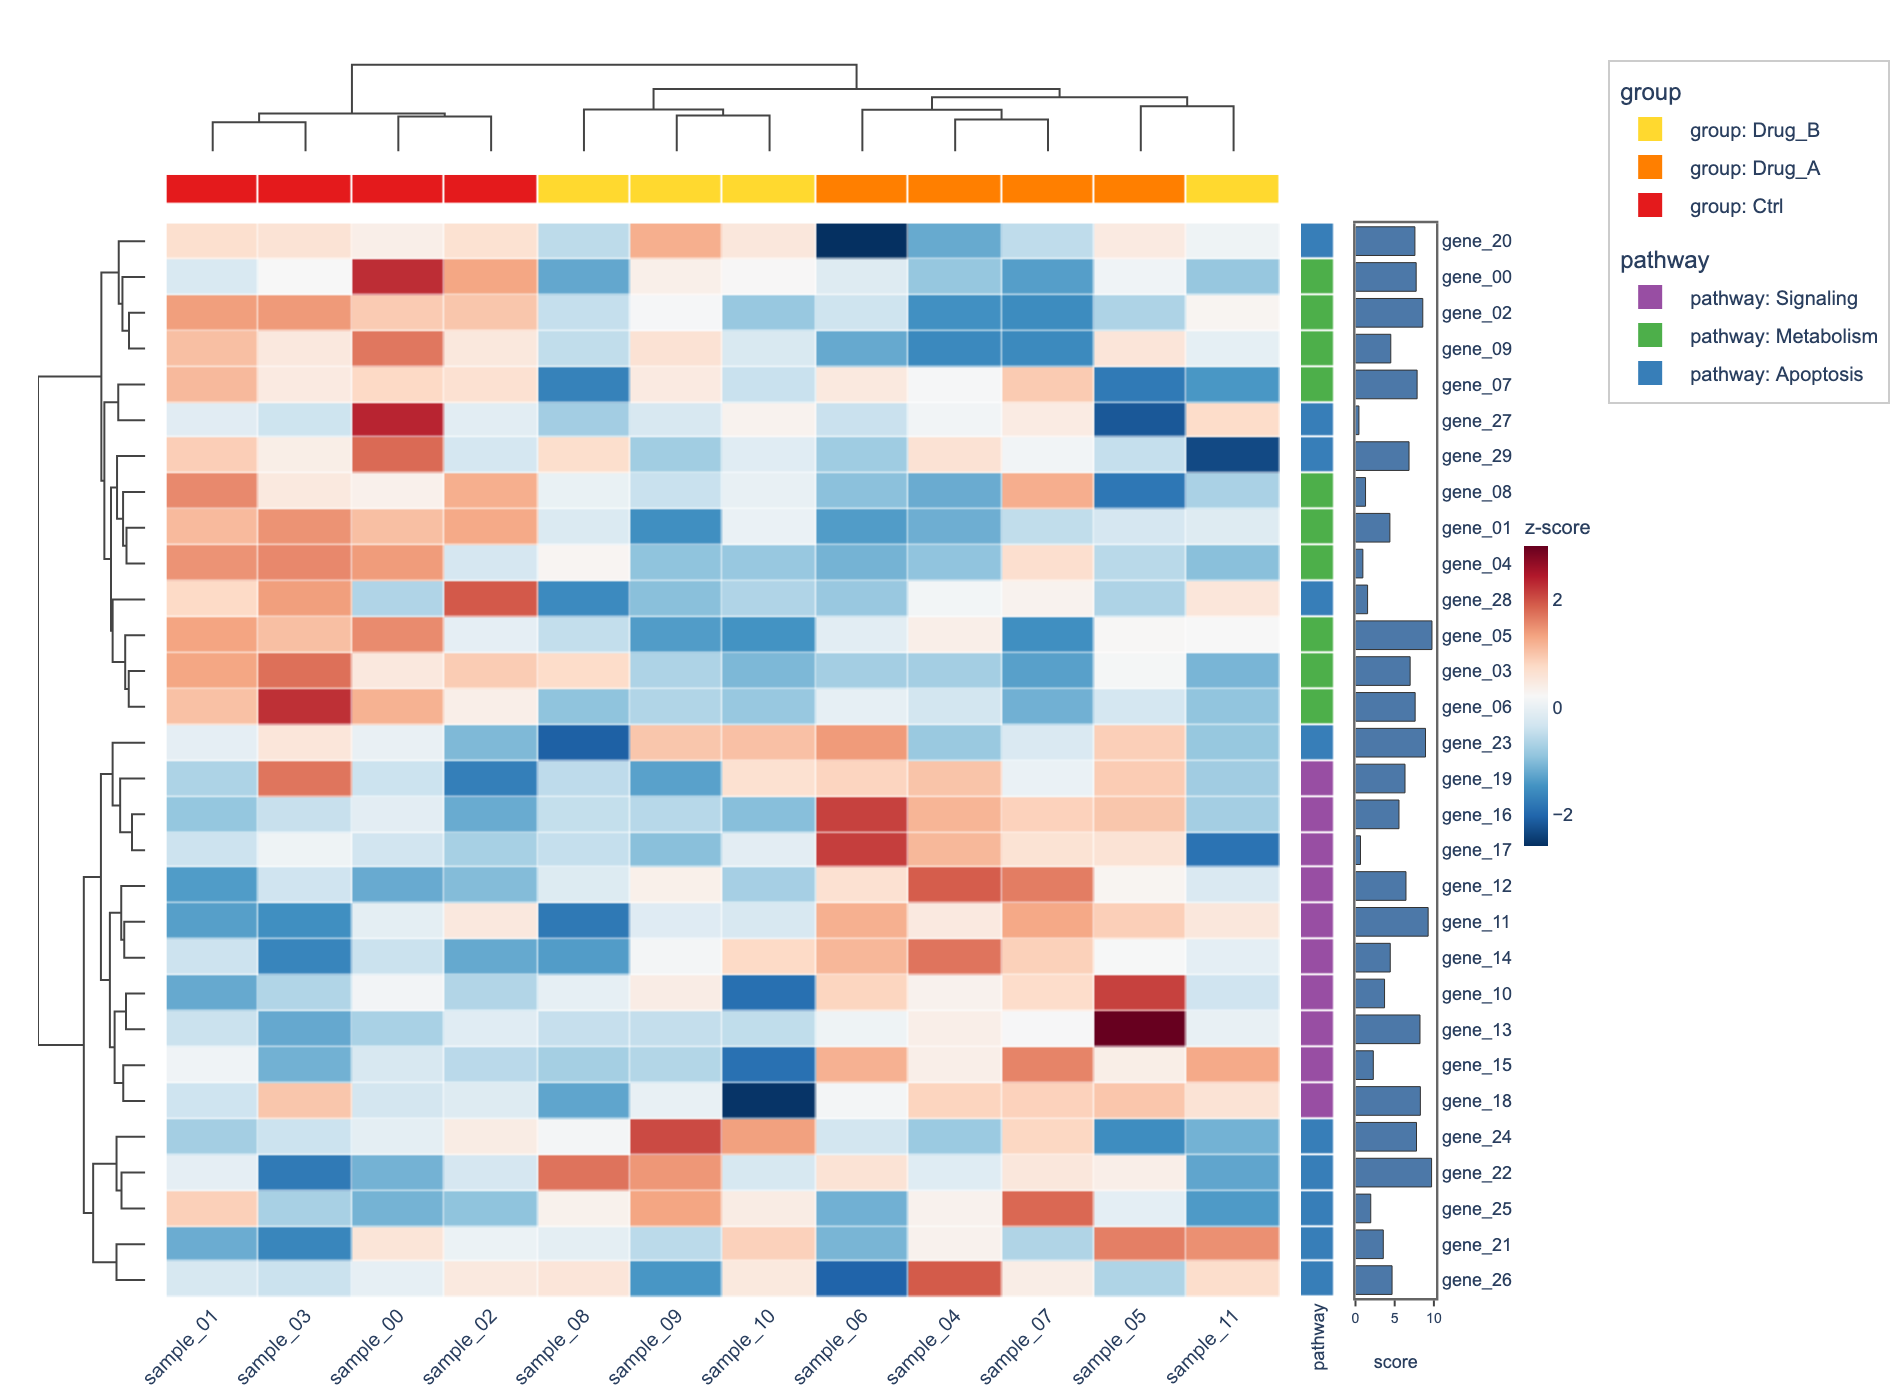

In [7]:
# Cell 7 — from_dataframe: single pandas DataFrame with mixed columns
# Simulates a typical Depictio workflow where data + metadata live in one table
import numpy as np
import pandas as pd
from plotly_complexheatmap import ComplexHeatmap

rng = np.random.default_rng(42)
n_genes, n_samples = 30, 12

# Build a single "flat" DataFrame: gene metadata + expression values
flat_df = pd.DataFrame(
    {
        "gene": [f"gene_{i:02d}" for i in range(n_genes)],
        "pathway": ["Metabolism"] * 10 + ["Signaling"] * 10 + ["Apoptosis"] * 10,
        "score": rng.uniform(0, 10, n_genes),
        **{f"sample_{j:02d}": rng.standard_normal(n_genes) for j in range(n_samples)},
    }
)

# Add a block signal so clustering is visible
flat_df.loc[:9, "sample_00":"sample_03"] += 2.5
flat_df.loc[10:19, "sample_04":"sample_07"] += 2.0

# One call — annotations are auto-extracted from the DataFrame columns
hm7 = ComplexHeatmap.from_dataframe(
    flat_df,
    index_column="gene",
    row_annotations={
        "pathway": {},  # auto-detected as categorical
        "score": {"type": "bar", "color": "#4C78A8"},  # explicit bar chart
    },
    col_annotations={
        "group": ["Ctrl"] * 4 + ["Drug_A"] * 4 + ["Drug_B"] * 4,
    },
    row_annotation_side="right",
    colorscale="RdBu_r",
    normalize="row",
    name="z-score",
    width=950,
    height=700,
)
hm7.to_plotly()

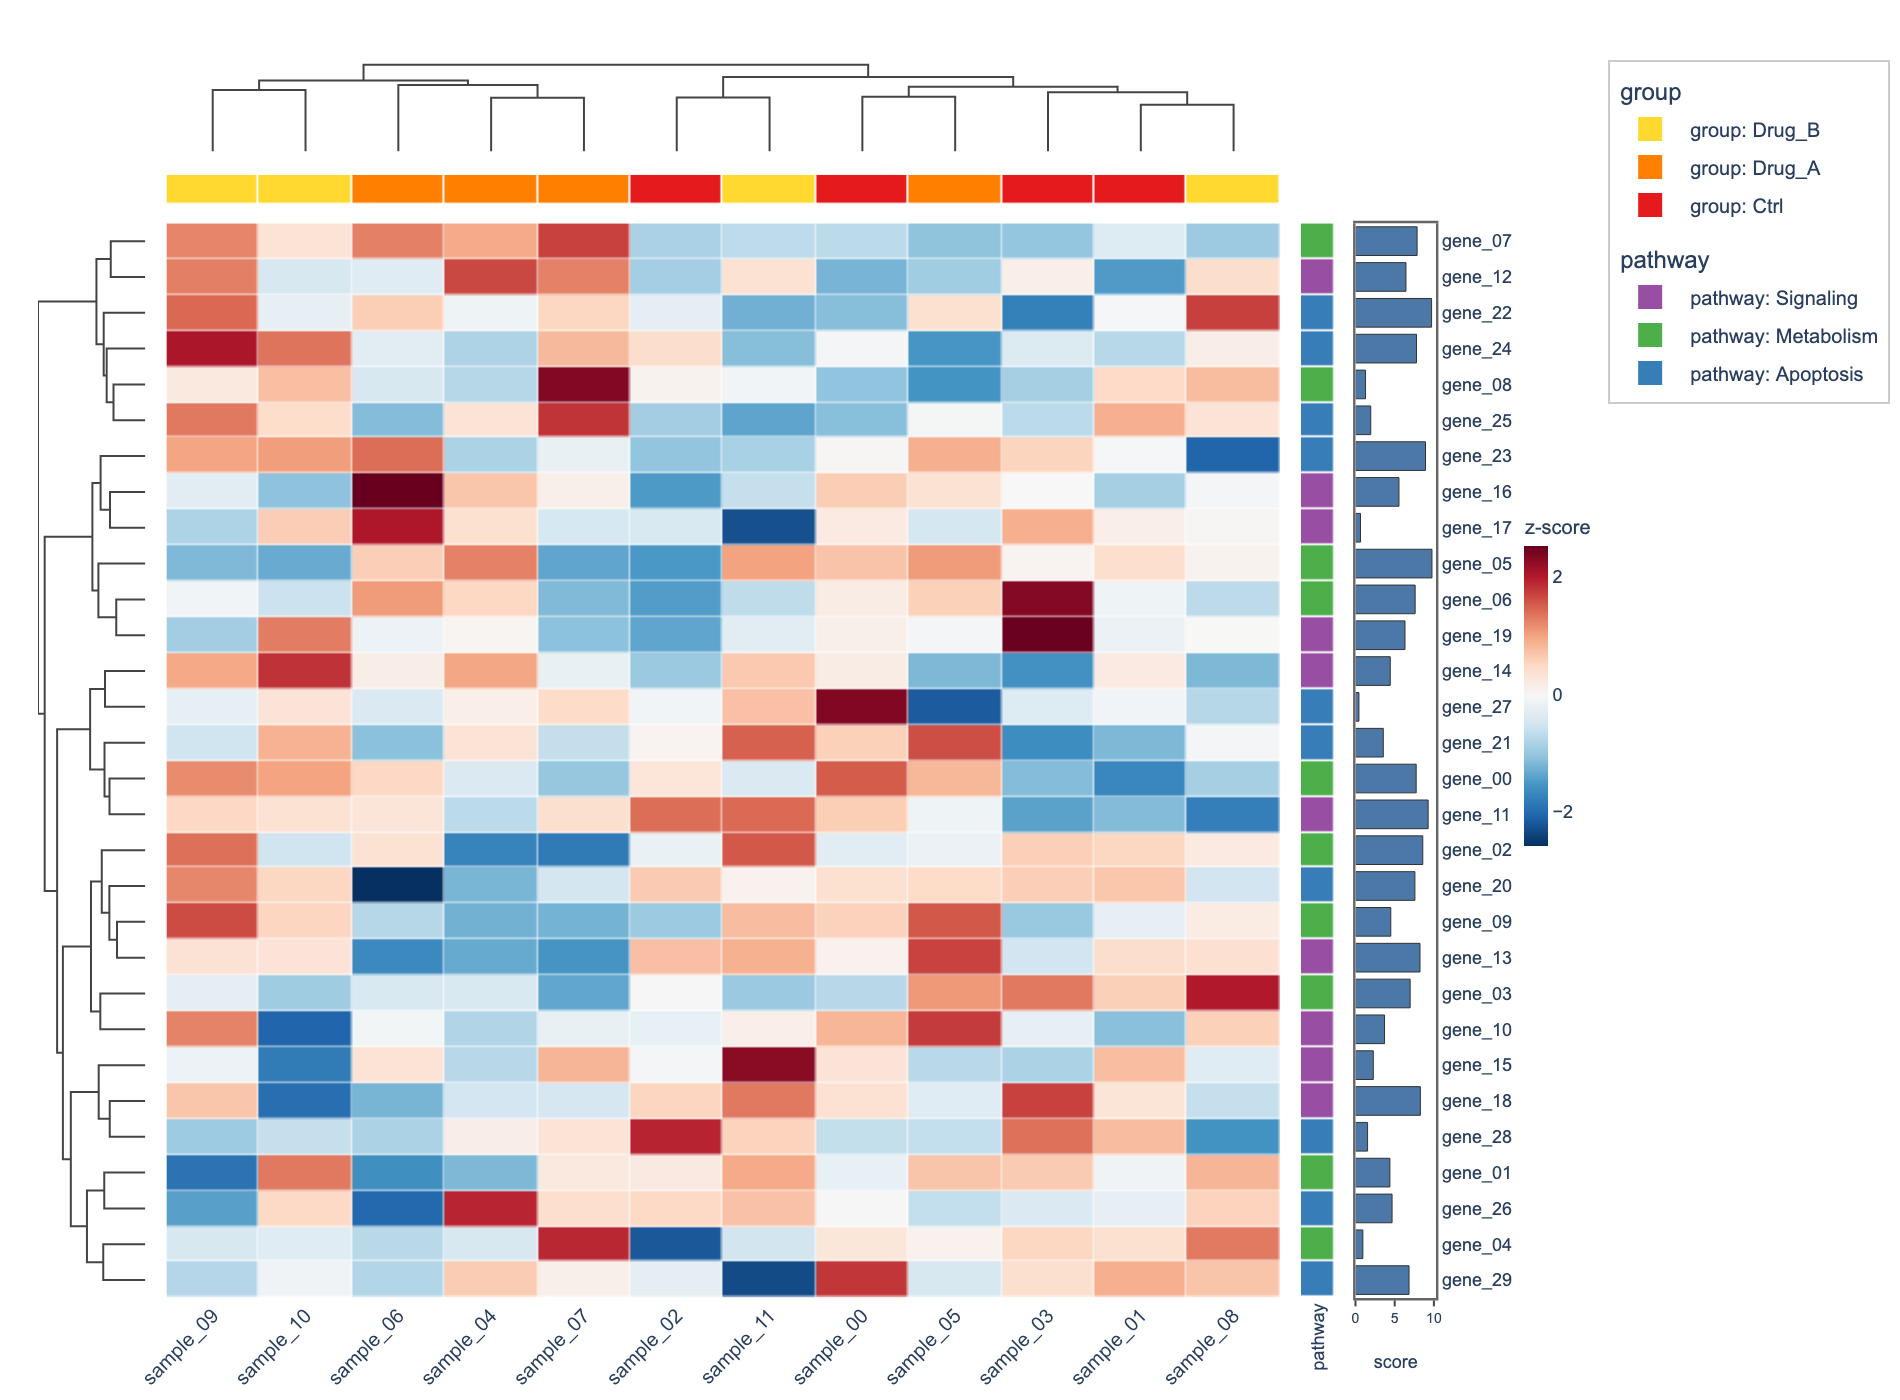

In [8]:
# Cell 8 — from_dataframe: polars DataFrame (same data as Cell 7)
import polars as pl
from plotly_complexheatmap import ComplexHeatmap

# Build the same dataset directly in polars
rng8 = np.random.default_rng(42)
n_g, n_s = 30, 12

pl_df = pl.DataFrame(
    {
        "gene": [f"gene_{i:02d}" for i in range(n_g)],
        "pathway": ["Metabolism"] * 10 + ["Signaling"] * 10 + ["Apoptosis"] * 10,
        "score": rng8.uniform(0, 10, n_g).tolist(),
        **{f"sample_{j:02d}": rng8.standard_normal(n_g).tolist() for j in range(n_s)},
    }
)

hm8 = ComplexHeatmap.from_dataframe(
    pl_df,
    index_column="gene",
    row_annotations=["pathway", "score"],  # auto-detect types
    col_annotations={
        "group": ["Ctrl"] * 4 + ["Drug_A"] * 4 + ["Drug_B"] * 4,
    },
    colorscale="RdBu_r",
    normalize="row",
    name="z-score",
    width=950,
    height=700,
)
hm8.to_plotly()